In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
n_values = 32
x = tf.linspace(-3.0, 3.0, n_values)


In [3]:
x

<tf.Tensor 'LinSpace:0' shape=(32,) dtype=float32>

In [4]:
sess = tf.Session()
result = sess.run(x)


In [5]:
print(result)

[-3.         -2.80645156 -2.61290312 -2.41935492 -2.22580647 -2.03225803
 -1.83870971 -1.64516139 -1.45161295 -1.25806451 -1.06451619 -0.87096786
 -0.67741942 -0.48387098 -0.29032278 -0.09677434  0.0967741   0.29032254
  0.48387098  0.67741919  0.87096763  1.06451607  1.25806427  1.45161295
  1.64516115  1.83870935  2.03225803  2.22580624  2.41935444  2.61290312
  2.80645132  3.        ]


In [6]:
x.eval(session=sess)

array([-3.        , -2.80645156, -2.61290312, -2.41935492, -2.22580647,
       -2.03225803, -1.83870971, -1.64516139, -1.45161295, -1.25806451,
       -1.06451619, -0.87096786, -0.67741942, -0.48387098, -0.29032278,
       -0.09677434,  0.0967741 ,  0.29032254,  0.48387098,  0.67741919,
        0.87096763,  1.06451607,  1.25806427,  1.45161295,  1.64516115,
        1.83870935,  2.03225803,  2.22580624,  2.41935444,  2.61290312,
        2.80645132,  3.        ], dtype=float32)

In [7]:
sess.close()
sess = tf.InteractiveSession()

In [8]:
x.eval()

array([-3.        , -2.80645156, -2.61290312, -2.41935492, -2.22580647,
       -2.03225803, -1.83870971, -1.64516139, -1.45161295, -1.25806451,
       -1.06451619, -0.87096786, -0.67741942, -0.48387098, -0.29032278,
       -0.09677434,  0.0967741 ,  0.29032254,  0.48387098,  0.67741919,
        0.87096763,  1.06451607,  1.25806427,  1.45161295,  1.64516115,
        1.83870935,  2.03225803,  2.22580624,  2.41935444,  2.61290312,
        2.80645132,  3.        ], dtype=float32)

In [9]:
sigma = 1.0
mean = 0.0
z = (tf.exp(tf.negative(tf.pow(x - mean, 2.0) /
                   (2.0 * tf.pow(sigma, 2.0)))) *
     (1.0 / (sigma * tf.sqrt(2.0 * 3.1415))))


In [10]:
z

<tf.Tensor 'mul_2:0' shape=(32,) dtype=float32>

In [11]:
session = tf.Session()

In [12]:
session.run(z)

array([ 0.00443191,  0.0077737 ,  0.01313394,  0.02137437,  0.03350599,
        0.05059209,  0.07358232,  0.10308496,  0.13910672,  0.18081389,
        0.22638434,  0.27301833,  0.31715256,  0.35487509,  0.38248441,
        0.39708439,  0.39708439,  0.38248444,  0.35487509,  0.31715262,
        0.27301839,  0.22638437,  0.18081395,  0.13910672,  0.103085  ,
        0.07358237,  0.05059209,  0.03350601,  0.02137439,  0.01313394,
        0.0077737 ,  0.00443191], dtype=float32)

In [13]:
assert z.graph is tf.get_default_graph()

In [14]:
plt.plot(z.eval())

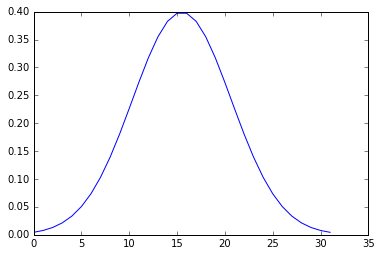

In [15]:
plt.show()

In [16]:
print(z.get_shape())

(32,)


In [17]:
print(z.get_shape().as_list())

[32]


In [19]:
print(tf.shape(z).eval())

[32]


In [20]:
print(tf.stack([tf.shape(z), tf.shape(z), [3], [4]]).eval())

[[32]
 [32]
 [ 3]
 [ 4]]


In [21]:

z_2d = tf.matmul(tf.reshape(z, [n_values, 1]), tf.reshape(z, [1, n_values]))

In [22]:
z_2d

<tf.Tensor 'MatMul:0' shape=(32, 32) dtype=float32>

In [23]:
session.run(z_2d)

array([[  1.96418587e-05,   3.44523723e-05,   5.82085049e-05, ...,
          5.82085049e-05,   3.44523869e-05,   1.96418587e-05],
       [  3.44523723e-05,   6.04304369e-05,   1.02099359e-04, ...,
          1.02099359e-04,   6.04304623e-05,   3.44523723e-05],
       [  5.82085049e-05,   1.02099359e-04,   1.72500484e-04, ...,
          1.72500484e-04,   1.02099402e-04,   5.82085049e-05],
       ..., 
       [  5.82085049e-05,   1.02099359e-04,   1.72500484e-04, ...,
          1.72500484e-04,   1.02099402e-04,   5.82085049e-05],
       [  3.44523869e-05,   6.04304623e-05,   1.02099402e-04, ...,
          1.02099402e-04,   6.04304878e-05,   3.44523869e-05],
       [  1.96418587e-05,   3.44523723e-05,   5.82085049e-05, ...,
          5.82085049e-05,   3.44523869e-05,   1.96418587e-05]], dtype=float32)

In [28]:
plt.imshow(z_2d.eval())

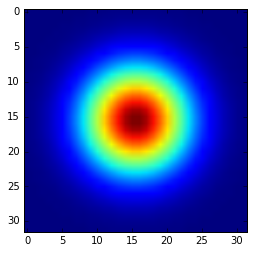

In [29]:
plt.show()

In [30]:
x = tf.reshape(tf.sin(tf.linspace(-3.0, 3.0, n_values)), [n_values, 1])
y = tf.reshape(tf.ones_like(x), [1, n_values])
z = tf.multiply(tf.matmul(x, y), z_2d)
plt.imshow(z.eval())

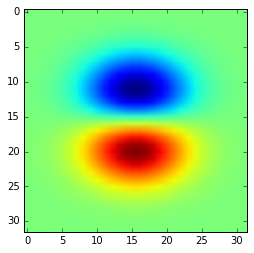

In [31]:
plt.show()

In [32]:
# %% We can also list all the operations of a graph:
ops = tf.get_default_graph().get_operations()
print([op.name for op in ops])


['LinSpace/start', 'LinSpace/stop', 'LinSpace/num', 'LinSpace', 'sub/y', 'sub', 'Pow/y', 'Pow', 'Pow_1/x', 'Pow_1/y', 'Pow_1', 'mul/x', 'mul', 'truediv', 'Neg', 'Exp', 'Sqrt/x', 'Sqrt', 'mul_1/x', 'mul_1', 'truediv_1/x', 'truediv_1', 'mul_2', 'Shape', 'Shape_1', 'Shape_2', 'stack/2_1', 'stack/3_1', 'stack', 'Reshape/shape', 'Reshape', 'Reshape_1/shape', 'Reshape_1', 'MatMul', 'LinSpace_1/start', 'LinSpace_1/stop', 'LinSpace_1/num', 'LinSpace_1', 'Sin', 'Reshape_2/shape', 'Reshape_2', 'ones_like/Shape', 'ones_like/Const', 'ones_like', 'Reshape_3/shape', 'Reshape_3', 'MatMul_1', 'Mul']


In [33]:
def gabor(n_values=32, sigma=1.0, mean=0.0):
    x = tf.linspace(-3.0, 3.0, n_values)
    z = (tf.exp(tf.negative(tf.pow(x - mean, 2.0) /
                       (2.0 * tf.pow(sigma, 2.0)))) *
         (1.0 / (sigma * tf.sqrt(2.0 * 3.1415))))
    gauss_kernel = tf.matmul(
        tf.reshape(z, [n_values, 1]), tf.reshape(z, [1, n_values]))
    x = tf.reshape(tf.sin(tf.linspace(-3.0, 3.0, n_values)), [n_values, 1])
    y = tf.reshape(tf.ones_like(x), [1, n_values])
    gabor_kernel = tf.multiply(tf.matmul(x, y), gauss_kernel)
    return gabor_kernel

In [34]:
# %% Confirm this does something:
plt.imshow(gabor().eval())

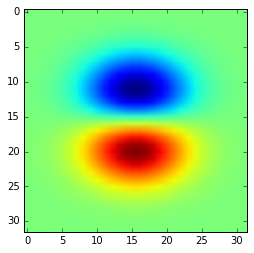

In [35]:
plt.show()

In [36]:
# %% And another function which can convolve
def convolve(img, W):
    # The W matrix is only 2D
    # But conv2d will need a tensor which is 4d:
    # height x width x n_input x n_output
    if len(W.get_shape()) == 2:
        dims = W.get_shape().as_list() + [1, 1]
        W = tf.reshape(W, dims)

    if len(img.get_shape()) == 2:
        # num x height x width x channels
        dims = [1] + img.get_shape().as_list() + [1]
        img = tf.reshape(img, dims)
    elif len(img.get_shape()) == 3:
        dims = [1] + img.get_shape().as_list()
        img = tf.reshape(img, dims)
        # if the image is 3 channels, then our convolution
        # kernel needs to be repeated for each input channel
        W = tf.concat(axis=2, values=[W, W, W])

    # Stride is how many values to skip for the dimensions of
    # num, height, width, channels
    convolved = tf.nn.conv2d(img, W,
                             strides=[1, 1, 1, 1], padding='SAME')
    return convolved

In [37]:

# %% Load up an image:
from skimage import data
img = data.astronaut()
plt.imshow(img)
print(img.shape)

(512, 512, 3)


In [38]:

# %% Now create a placeholder for our graph which can store any input:
x = tf.placeholder(tf.float32, shape=img.shape)

In [39]:

# %% And a graph which can convolve our image with a gabor
out = convolve(x, gabor())

In [40]:
# %% Now send the image into the graph and compute the result
result = tf.squeeze(out).eval(feed_dict={x: img})
plt.imshow(result)

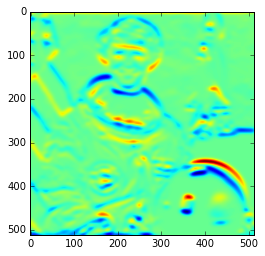

In [41]:
plt.show()

In [42]:
img2 = data.astronaut()
plt.imshow(img2)
print(img2.shape)

(512, 512, 3)


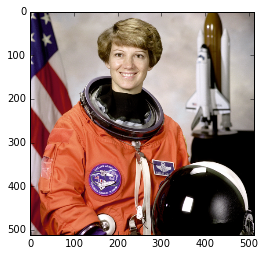

In [43]:
plt.show()